<a href="https://colab.research.google.com/github/profsong/wnd_course/blob/main/inugsl_wnd_code1_mip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WND (Warehouse and Network Design) : Mathematical Programming
WND 과목의 네트워크 설계 관련 최적화 모델 기초 내용입니다.
각각의 예제를 테스트하기 전 먼저 아래의 코드를 실행해야 합니다. 


In [ ]:
!pip install ortools

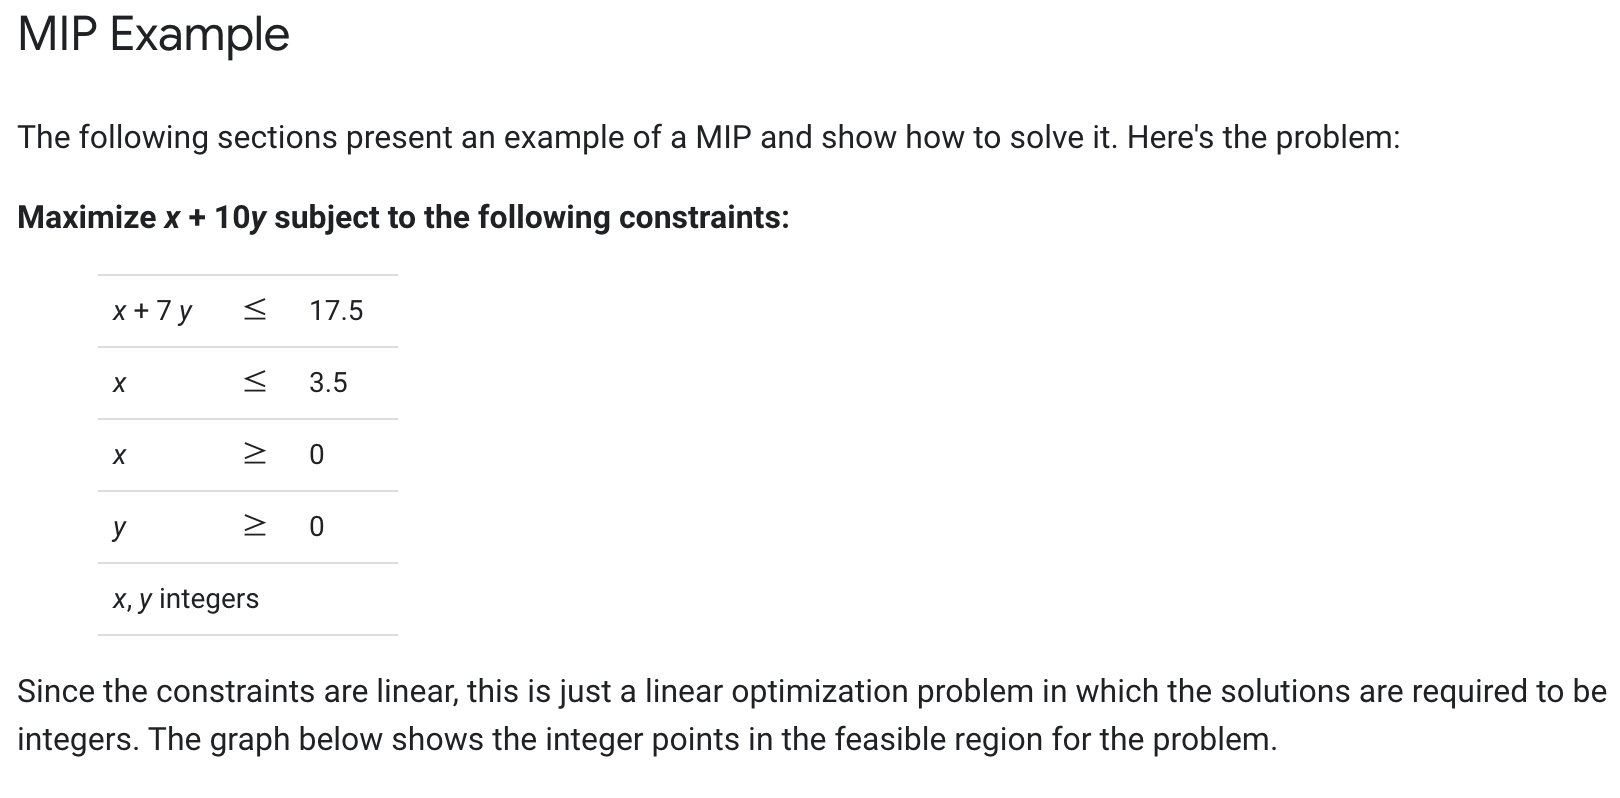

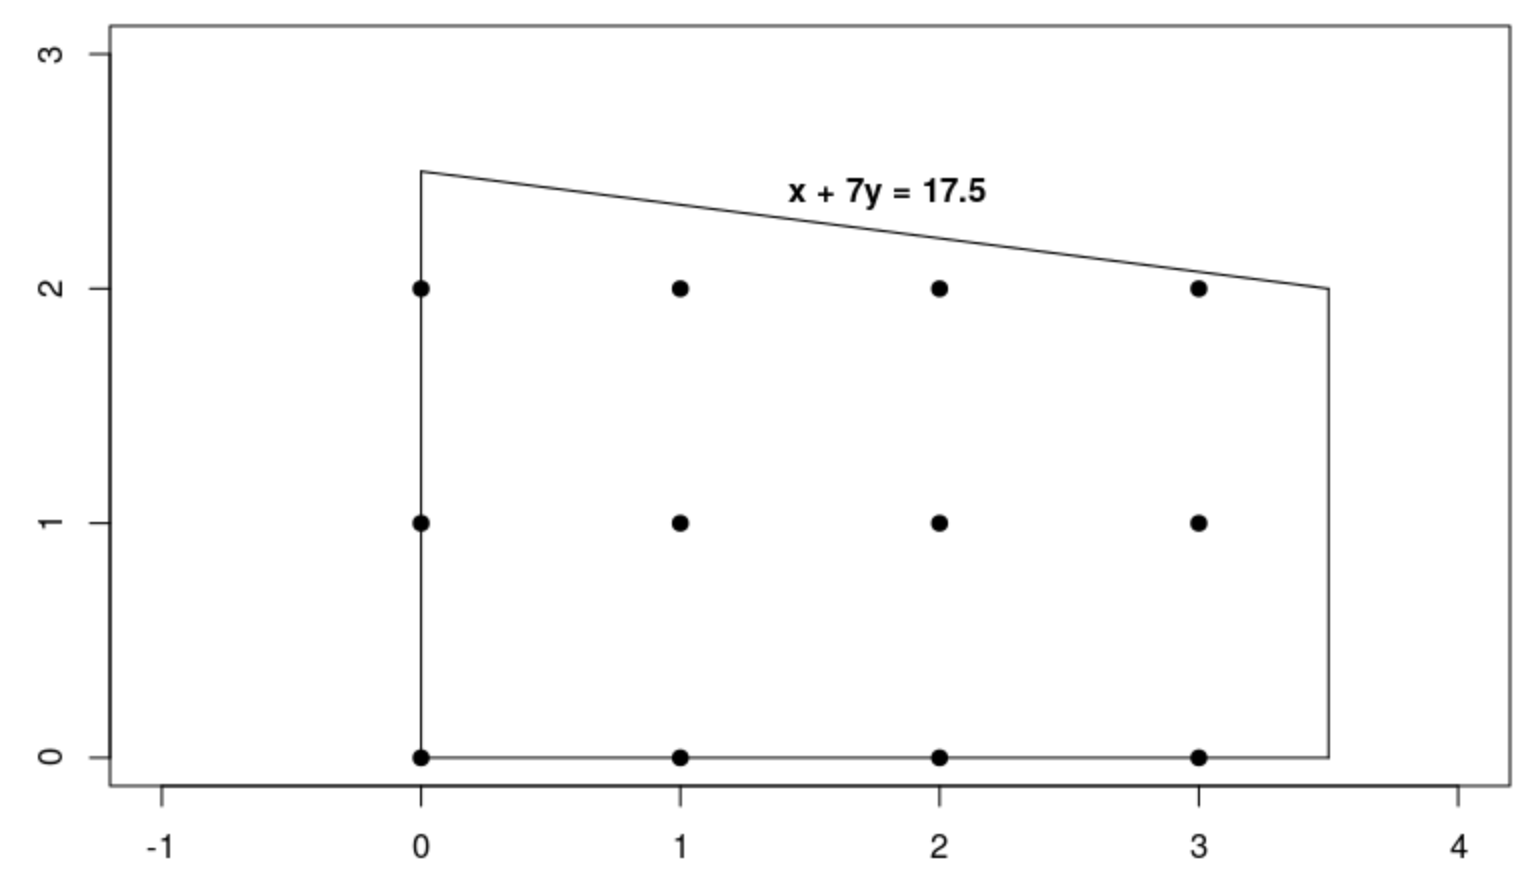

<BR>
자세한 설명은 아래 링크에서 확인 가능합니다. <br>

https://developers.google.com/optimization/mip/integer_opt

In [1]:
from __future__ import print_function
from ortools.linear_solver import pywraplp


def main():

  #-----------------------------------------------------
  # Create the mip solver with the SCIP or CBC backend.

  solver = pywraplp.Solver.CreateSolver('SCIP')


  #-----------------------------------------------------
  # DECISION VARIABLES : 변수를 정의합니다. 
  # x and y are integer non-negative variables.

  infinity = solver.infinity()
  x = solver.IntVar(0.0, infinity, 'x')
  y = solver.IntVar(0.0, infinity, 'y')

  print('Number of variables =', solver.NumVariables())


  #-----------------------------------------------------
  # CONSTRAINTS : 제약식을 입력합니다. 

  # x + 7 * y <= 17.5.
  solver.Add(x + 7 * y <= 17.5,'FIRST')

  # x <= 3.5.
  solver.Add(x <= 3.5,'SECOND')

  print('Number of constraints =', solver.NumConstraints())


  #-----------------------------------------------------
  # Objective Function : 목적함수를 정의합니다. 
  # Maximize x + 10 * y.
  solver.Maximize(x + 10 * y)


  #-----------------------------------------------------
  # Optimization : 최적화 로직을 실행합니다.
  status = solver.Solve()


  #-----------------------------------------------------
  # PRINT FORMULATION : 최적화 결과를 다양한 형태로 출력합니다. 

  if status == pywraplp.Solver.OPTIMAL:
    print('Solution:')
    print('Objective value =', solver.Objective().Value())
    print('x =', x.solution_value())
    print('y =', y.solution_value())
  else:
    print('The problem does not have an optimal solution.')

  print('\nAdvanced usage:')
  print('Problem solved in %f milliseconds' % solver.wall_time())
  print('Problem solved in %d iterations' % solver.iterations())
  print('Problem solved in %d branch-and-bound nodes' % solver.nodes())

  #-----------------------------------------------------
  # PRINT MODEL : 최적화 모델 (Mathematical Programming Formulation)을 출력합니다. 

  lp_formulation = solver.ExportModelAsLpFormat(False)
  print(lp_formulation)

if __name__ == '__main__':
  main()

ModuleNotFoundError: ignored

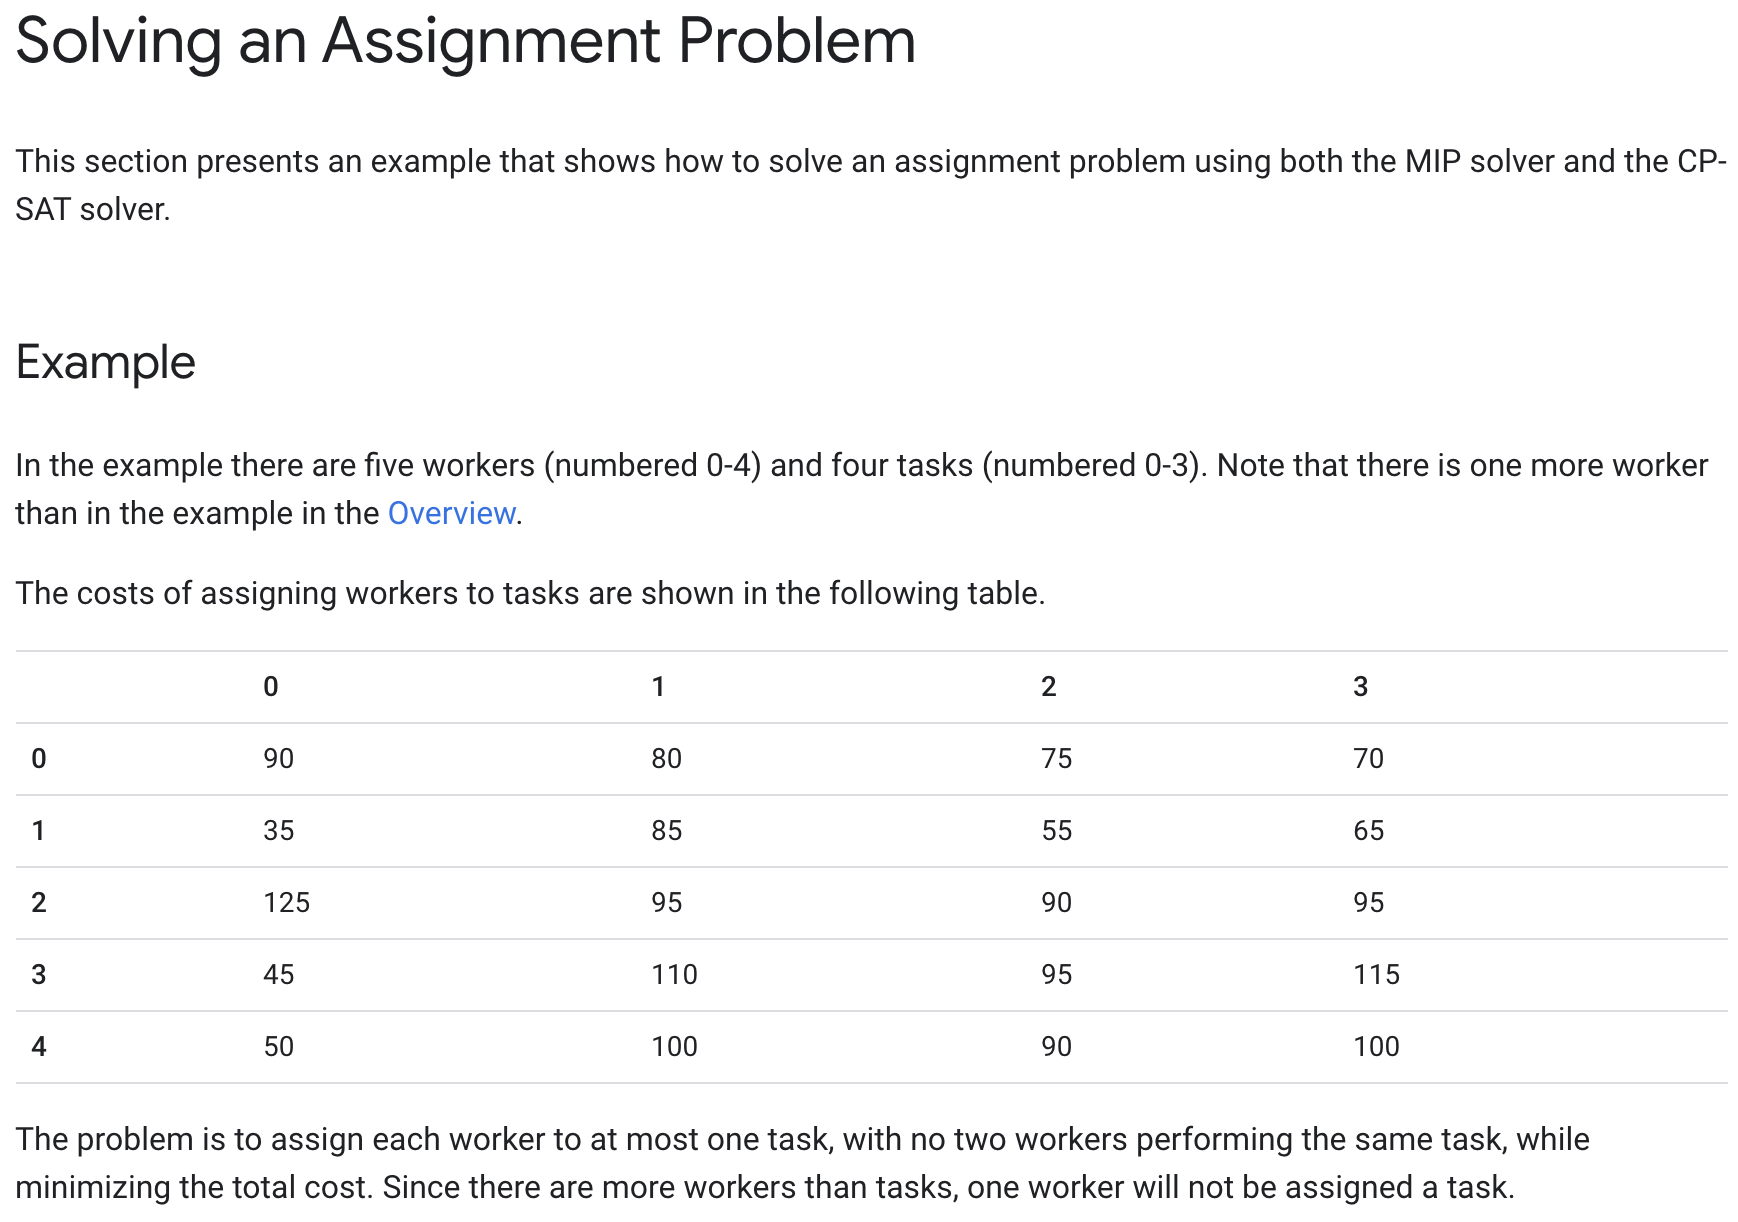

<BR>
자세한 설명은 아래 링크에서 확인 가능합니다. <br>

https://developers.google.com/optimization/assignment/assignment_example

In [ ]:
from ortools.linear_solver import pywraplp

if __name__ == '__main__':



  # Data
  costs = [
      [90, 80, 75, 70],
      [35, 85, 55, 65],
      [125, 95, 90, 95],
      [45, 110, 95, 115],
      [50, 100, 90, 100],
  ]
  num_workers = len(costs)
  num_tasks = len(costs[0])


  #----------------------------------------------------------------
  # Solver :  Create the mip solver with the CBC backend.
  solver = pywraplp.Solver.CreateSolver('CBC')


  #----------------------------------------------------------------
  # Variables
  # x[i, j] is an array of 0-1 variables, which will be 1
  # if worker i is assigned to task j.
  x = {}
  for i in range(num_workers):
      for j in range(num_tasks):
          x[i, j] = solver.IntVar(0, 1, 'x[%i,%i]'%(i,j))


  #----------------------------------------------------------------
  # Constraints
  # Each worker is assigned to at most 1 task.
  for i in range(num_workers):
      solver.Add(solver.Sum([x[i, j] for j in range(num_tasks)]) <= 1,'C_WORKER[%i]'%i)

  # Each task is assigned to exactly one worker.
  for j in range(num_tasks):
      solver.Add(solver.Sum([x[i, j] for i in range(num_workers)]) == 1,'C_TASK[%i]'%j)


  #----------------------------------------------------------------
  # Objective
  objective_terms = []
  for i in range(num_workers):
      for j in range(num_tasks):
          objective_terms.append(costs[i][j] * x[i, j])
  solver.Minimize(solver.Sum(objective_terms))


  #----------------------------------------------------------------
  # Solve
  status = solver.Solve()


  #----------------------------------------------------------------
  # Print solution.
  if status == pywraplp.Solver.OPTIMAL or status == pywraplp.Solver.FEASIBLE:
      print('Total cost = ', solver.Objective().Value(), '\n')
      for i in range(num_workers):
          for j in range(num_tasks):
              # Test if x[i,j] is 1 
              # (with tolerance for floating point arithmetic).
              if x[i, j].solution_value() > 0.5:
                  print('Worker %d assigned to task %d.  Cost = %d' %
                        (i, j, costs[i][j]))

  #----------------------------------------------------------------
  # Print Model
  lp_formulation = solver.ExportModelAsLpFormat(False)
  print(lp_formulation)